<a href="https://colab.research.google.com/github/dhruvtadkal/Customer-Churn-Analysis/blob/main/Customer_Churn_Service_Provider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Custumer Churn**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
telco_data = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking if there's null values in any column
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telco_data.TotalCharges.value_counts()

           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
1863.8      1
740.8       1
7532.15     1
1653.85     1
2405.05     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
#clean TotalCharges variable

def clean_id(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
a = telco_data.copy()
a['TotalCharges'] = a['TotalCharges'] .apply(clean_id)


In [ ]:
#exploring what could be the dirty values in the total_charges column
b = list(a[a['TotalCharges'].isnull()].index)

In [ ]:
b

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [ ]:
telco_data.iloc[b]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
telco_data['TotalCharges'] = telco_data['TotalCharges'] .apply(clean_id)

In [ ]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#putting all object columns in object_columns to use for vizualisation purposes

object_columns = list(telco_data.select_dtypes(include=['object']).columns)
object_columns.remove('customerID')
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
#putting all numeric columns in numeric_columns to use for vizualisation purposes

numeric_columns = list(telco_data.select_dtypes(include=['int64', 'float64']).columns)
numeric_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

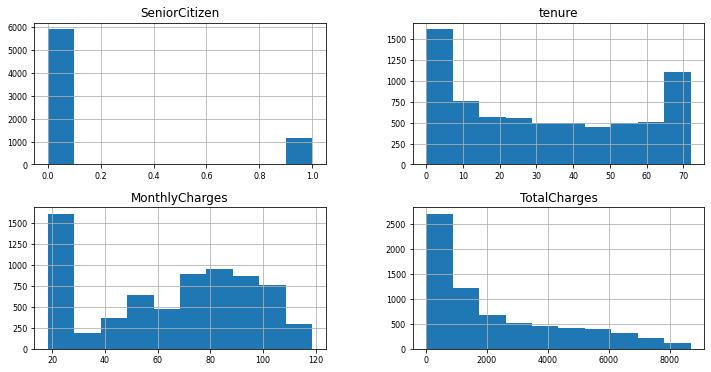

In [ ]:
#vizualizing all the numeric columns

telco_data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

In [ ]:
telco_data_churn = telco_data[telco_data['Churn']=='Yes']
telco_data_no_churn = telco_data[telco_data['Churn']=='No']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

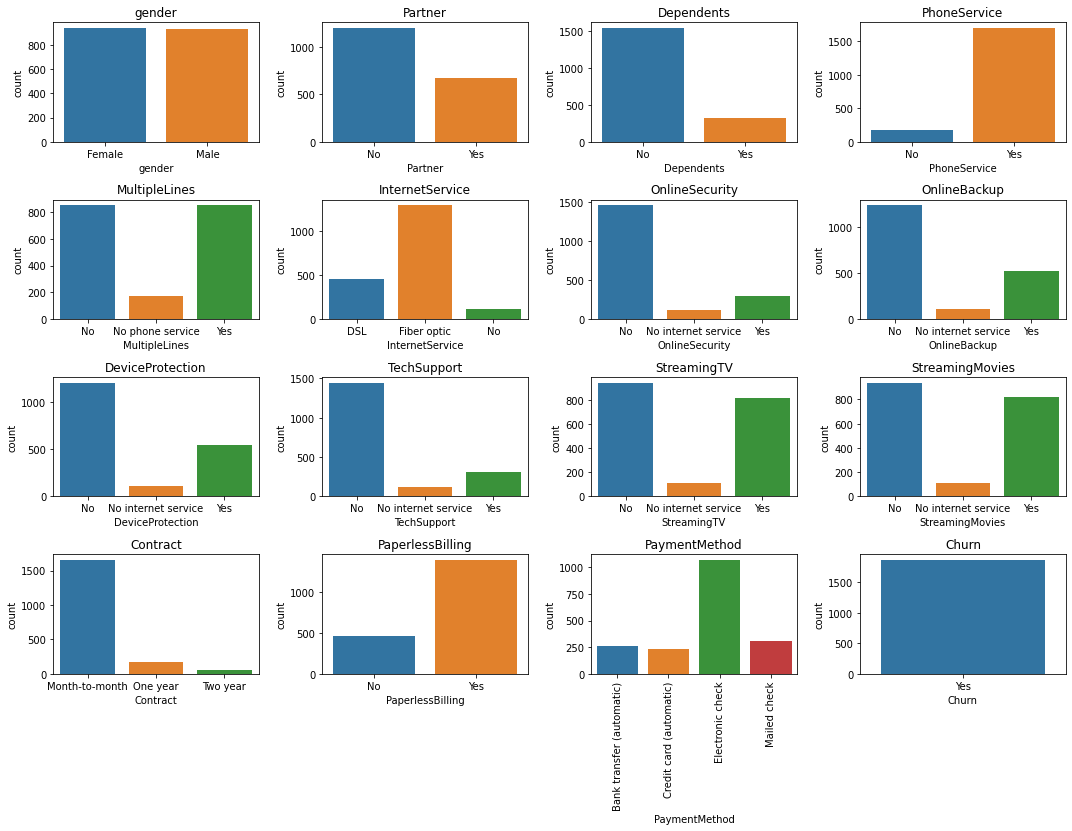

In [ ]:
#visualizing all categorical variables in telco_data_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

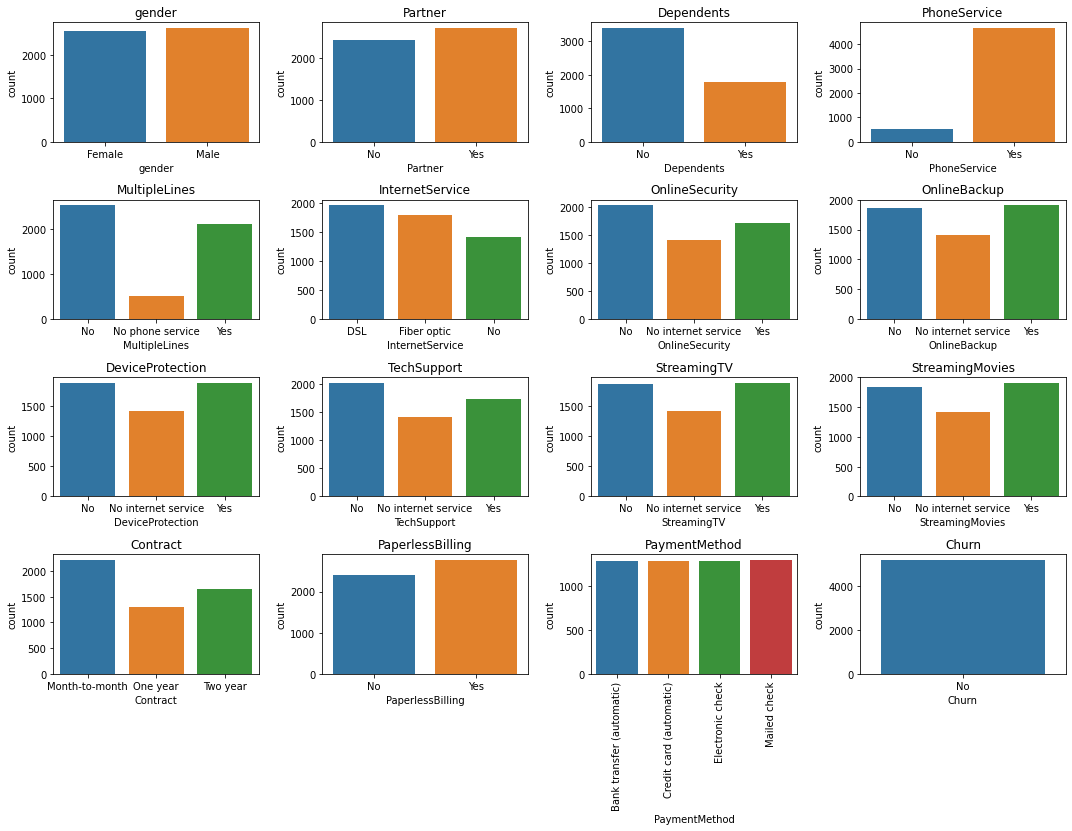

In [ ]:
#vizualising all categorical variables in telco_data_no_churn

fig, ax = plt.subplots(4, 4, figsize=(15, 10))
for variable, subplot in zip(object_columns, ax.flatten()):
    sns.countplot(telco_data_no_churn[variable].sort_values(), ax=subplot)
    subplot.title.set_text(variable)
    plt.tight_layout()
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

for label in ax[3,2].get_xticklabels():
  label.set_rotation(90)

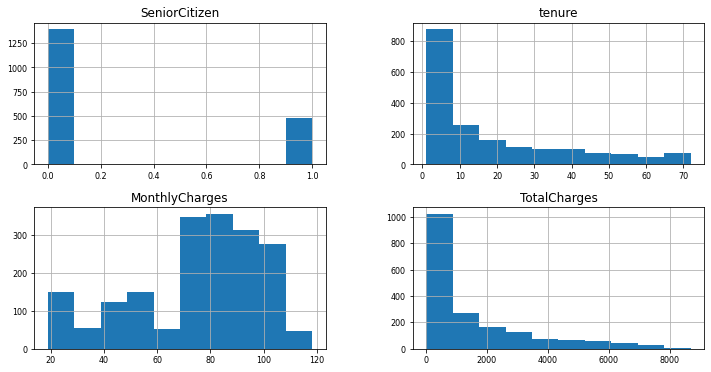

In [ ]:
##vizualising all numeric variables in telco_data_churn

telco_data_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

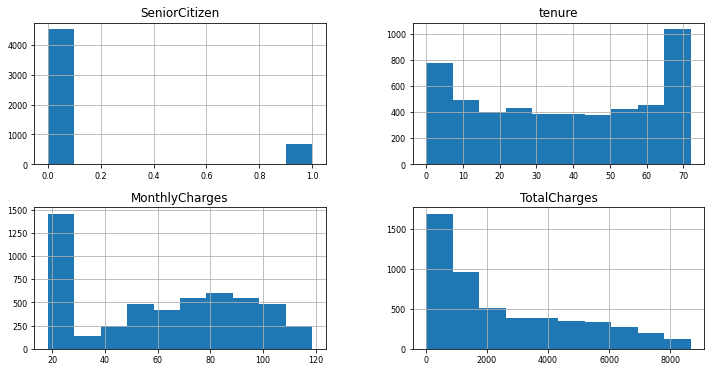

In [ ]:
##vizualising all numeric variables in telco_data_no_churn

telco_data_no_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8); 

In [ ]:
#imputing null values with median
telco_data['TotalCharges'] = telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].median())

In [ ]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#Putting predicors data in X, churn values in y

#using one hot encoding to encode categorical variables

X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])


In [ ]:
print(X.head())
print(y.head())

   SeniorCitizen  ...  PaymentMethod_Mailed check
0              0  ...                           0
1              0  ...                           1
2              0  ...                           1
3              0  ...                           0
4              0  ...                           0

[5 rows x 45 columns]
0    0
1    0
2    1
3    0
4    1
dtype: int64


In [ ]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [ ]:
X_train.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

In [ ]:
y_train

2707    1
3901    0
1514    0
6349    0
1346    1
       ..
2422    0
278     0
4637    0
928     0
1332    0
Length: 5282, dtype: int64

In [ ]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='roc_auc')

grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with AUC
Best parameters: {'max_features': 11, 'n_estimators': 100}
Best cross-validation score (AUC)): 0.826


array([0.01871861, 0.13995126, 0.15013782, 0.16882752, 0.01745065,
       0.01731502, 0.01386479, 0.01453358, 0.01141392, 0.0120488 ,
       0.00280659, 0.0024899 , 0.01172176, 0.00307201, 0.01158374,
       0.00879133, 0.03176018, 0.00137644, 0.03587128, 0.00136066,
       0.00977718, 0.01322505, 0.00108286, 0.01224524, 0.01164935,
       0.00144894, 0.0109039 , 0.02871744, 0.00180802, 0.00879511,
       0.01058437, 0.00208302, 0.00934453, 0.01009246, 0.00036376,
       0.01042144, 0.07032071, 0.00675819, 0.01451011, 0.01552775,
       0.01481546, 0.01091371, 0.01123512, 0.02718686, 0.01109356])

In [ ]:
# fitting randomforest again with the best hyperparameters received from gridsearchcv
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, max_features = 7)
rnd_clf.fit(X_train, y_train)
#for name, importance in zip(list(X_train.columns), rnd_clf.feature_importances_):
 # print(name, "=", importance)
 

RandomForestClassifier(max_features=7, n_jobs=-1, random_state=42)

In [ ]:
thresholds = np.linspace(0, 1, 100)
y_scores = rnd_clf.predict_proba(X_test)[:, 1]
scores = []
for threshold in thresholds:
    y_hat = (y_scores > threshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=y_test.values),
                 precision_score(y_pred=y_hat, y_true=y_test.values),
                 fbeta_score(y_pred=y_hat, y_true=y_test.values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.7300884955752213 13


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
features = list(X_train.columns)
importances = list(rnd_clf.feature_importances_)
feature_importances_df = pd.DataFrame({'feature' : features, 'importance' : importances})
feature_importances_df = feature_importances_df.sort_values(by = 'importance', ascending=False)

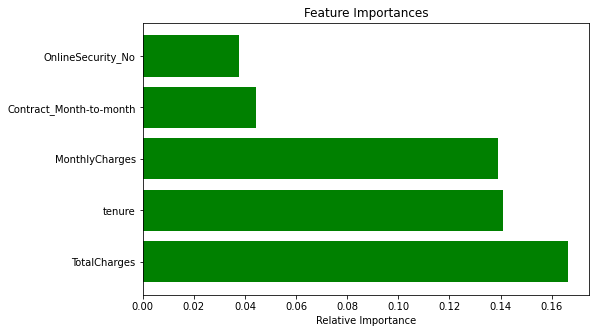

In [ ]:
#plotting top 5 features learnt.

plt.figure(figsize=(8, 5))
plt.title('Feature Importances')
plt.barh(range(0,5), feature_importances_df['importance'][0:5], color='green', align='center')
plt.yticks(range(0,5), [i for i in feature_importances_df.feature[0:5]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
telco_data[telco_data['Churn'] == 'Yes'].shape[0]/telco_data.shape[0]

0.2653698707936959

In [ ]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with accuracy
Best parameters: {'max_features': 11, 'n_estimators': 50}
Best cross-validation score (accuracy)): 0.788


array([0.01949812, 0.13681475, 0.14802491, 0.16663908, 0.01748875,
       0.01758376, 0.01341184, 0.01310764, 0.01296939, 0.01240191,
       0.00265902, 0.00246622, 0.0112882 , 0.00219077, 0.01122609,
       0.01049623, 0.02898984, 0.00033269, 0.04316629, 0.00431931,
       0.00906828, 0.01508647, 0.00020293, 0.01227855, 0.01166534,
       0.00080891, 0.0109982 , 0.03173655, 0.00054127, 0.00817616,
       0.01035769, 0.00040463, 0.00989056, 0.01019618, 0.00218444,
       0.01136544, 0.07752051, 0.00675352, 0.00840772, 0.01401782,
       0.01501138, 0.010839  , 0.01060272, 0.02565011, 0.0111608 ])

In [ ]:
y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.7773992049971608
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1294
           1       0.60      0.48      0.53       467

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



array([[1146,  148],
       [ 244,  223]])

The accuracy is not very good in the test set. We only oversampled our training set and we have 86% accuracy there. We dint oversample our test as it could have led to **data leakage**.

In [ ]:
X = telco_data.copy().drop(columns = ['customerID'])
y = X['Churn']

labelencoder = LabelEncoder()
y = pd.Series(labelencoder.fit_transform(y))

dummy_cols = object_columns.copy()
dummy_cols.remove('Churn')

X =  pd.get_dummies(X, columns = dummy_cols).drop(columns = ['Churn'])



In [ ]:
#importing adasyn
from imblearn.over_sampling import ADASYN


In [ ]:
X_over_sampling_adasyn = X.copy()
scaler = StandardScaler()
X_over_sampling_adasyn = pd.DataFrame(scaler.fit_transform(X_over_sampling_adasyn))

In [ ]:
X_over_sampling_adasyn.shape

(7043, 45)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over_sampling_adasyn,y,random_state=100,shuffle = True, stratify = y, test_size = 0.25)

In [ ]:
def makeOverSamplesADASYN(X,y):

  from imblearn.over_sampling import ADASYN 
  sm = ADASYN()
  X, y = sm.fit_resample(X, y)
  return(X,y)

In [ ]:
X_over_sampling_adasyn,y_sampling_adasyn = makeOverSamplesADASYN(X_train,y_train)

In [ ]:
clf = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50, 100],
              "max_features": [1, 3, 7, 11, 15],
              
              }
#f1 = make_scorer(f1_score , average='weighted')
# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='accuracy')

grid.fit(X_over_sampling_adasyn, y_sampling_adasyn)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
#print("feature importances: {:.3f}".format(grid.best_estimator_.feature_importances_))

grid.best_estimator_.feature_importances_

Grid-Search with accuracy
Best parameters: {'max_features': 1, 'n_estimators': 100}
Best cross-validation score (accuracy)): 0.858


array([0.01970199, 0.1133476 , 0.10481251, 0.11580087, 0.0197762 ,
       0.02043144, 0.01856526, 0.02036935, 0.01575295, 0.01591174,
       0.00239951, 0.00239604, 0.01483586, 0.00248776, 0.0150001 ,
       0.01632645, 0.02141384, 0.00275563, 0.02484835, 0.00452248,
       0.02084995, 0.01982979, 0.00643457, 0.01652002, 0.01857397,
       0.00449899, 0.01386574, 0.02782842, 0.001905  , 0.01986462,
       0.01353958, 0.00519187, 0.01265685, 0.01294141, 0.00268609,
       0.01239718, 0.04923028, 0.01884303, 0.02894028, 0.02074992,
       0.02177672, 0.01704525, 0.01773503, 0.03245581, 0.01218369])

In [ ]:
y_pr=rnd_clf.predict(X_test)
print(accuracy_score(y_pr,y_test))
print(classification_report(y_test, y_pr,target_names=["0","1"]))
confusion_matrix(y_test, y_pr)

0.6933560477001703
              precision    recall  f1-score   support

           0       0.88      0.67      0.76      1294
           1       0.45      0.75      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[871, 423],
       [117, 350]])

Even adasyn has a bad accuracy score on test set. Though its not fair to compare the results from over sampling techniques and the model which we build just in our original dataset using AUC metric, it all depends on the company and their goals. 

**The random forest model on the original dataset can be used by controlling the thresholds to predict the probability of churn to use it for useful business insights.**